# **Tugas Praktikum 12 - Optical Character Recognition (OCR)**

Nama : Alfan Olivan

NIM : 2141720078

## **Tugas**

Tugas ini bertujuan untuk mendeteksi orientasi teks dan jenis skrip yang digunakan dalam suatu gambar menggunakan tesseract.

1. Persiapan Gambar:
  - Gunakan gambar contoh yang disediakan ('hitchhikers-rotated.png').
  - Tampilkan gambar asli menggunakan Python dan OpenCV.

2. Deteksi Orientasi dan Skrip:
  - Implementasikan skrip Python untuk mendeteksi orientasi teks dalam gambar.
  - Gunakan Tesseract untuk mendapatkan sudut rotasi (angle) dan jenis skrip (script).
  - Tampilkan hasil orientasi dan jenis skrip.

* Instalasi dan Import Library

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 9 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,242 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [2]:
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

* Load Image

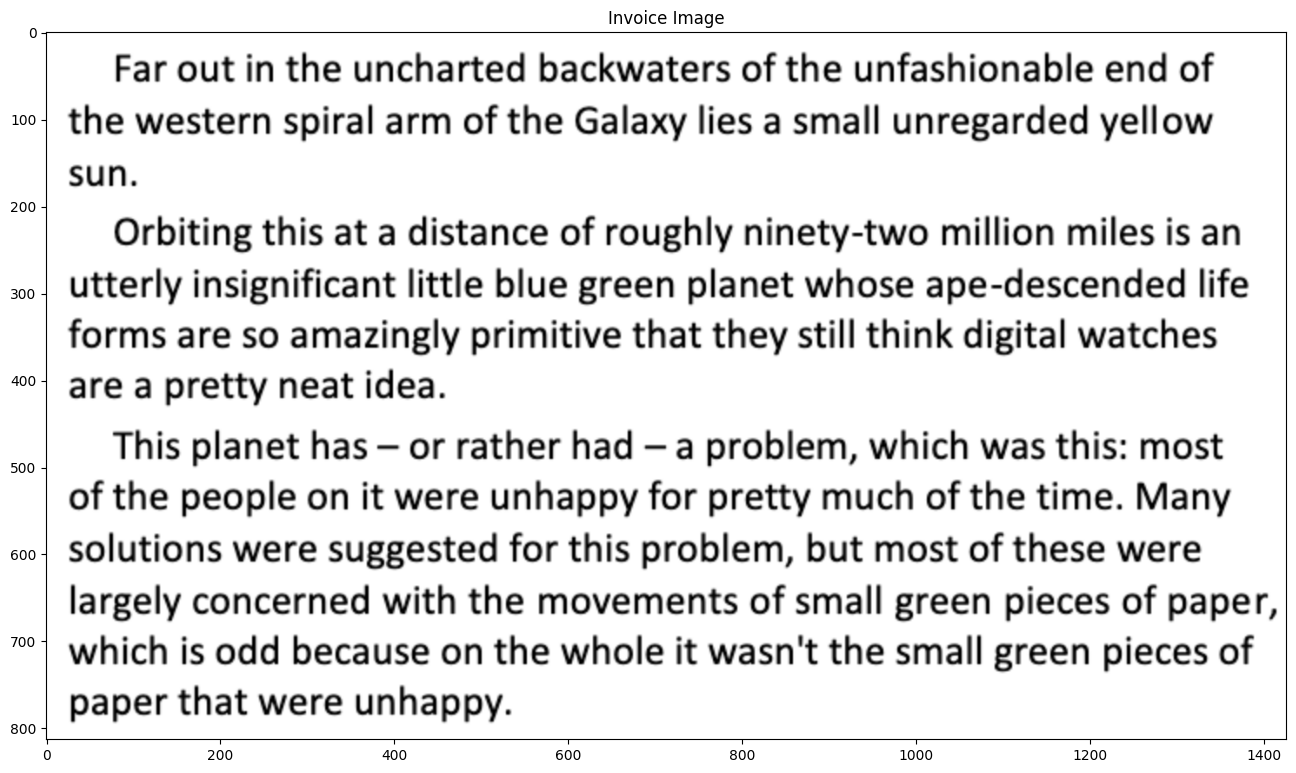

In [4]:
image = cv2.imread('/content/drive/MyDrive/Machine_Learning/OCR_1/hitchhikers-rotated.png')

# Rotate Image
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Display Image
plt.figure(figsize=(16, 12))
plt.imshow(rotated_image)
plt.title('Invoice Image')
plt.show()

* Pre-Process Image

In [6]:
# Convert the image to grayscale
gray = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)

# Edge detection using Canny
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Find lines using Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

# Extract the rotation angle from the detected lines
angle = lines[0][0][1] if lines is not None else 0

* OCR using pytesseract

In [8]:
text_invoice = pytesseract.image_to_string(rotated_image)

print(f"Text Orientation: {angle} degrees\n")
print(f"OCR Result: \n{text_invoice}")

Text Orientation: 1.5707963705062866 degrees

OCR Result: 
Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had — a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.

